In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (1).csv


In [14]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015 (1).csv


In [15]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015 (1).csv


In [16]:
import pandas as pd

df_binary = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df_5050 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_012 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

df_binary.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


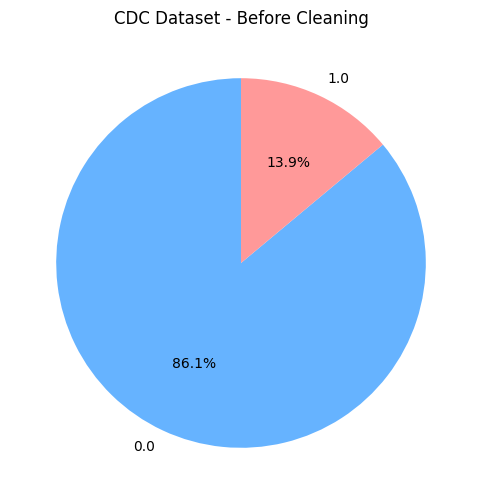

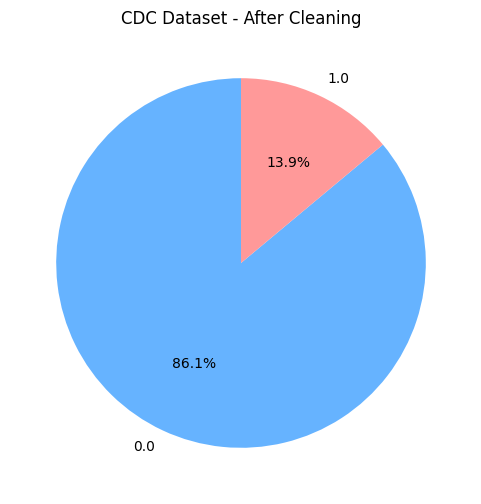

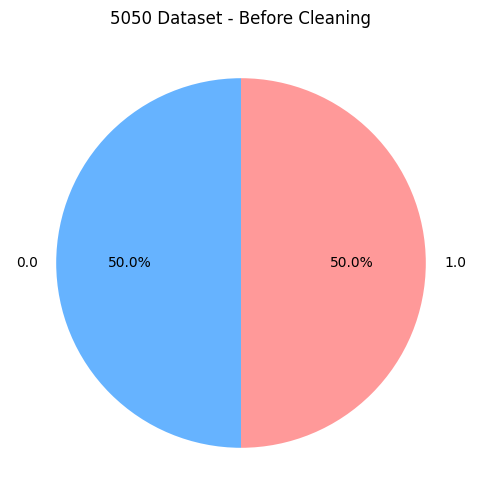

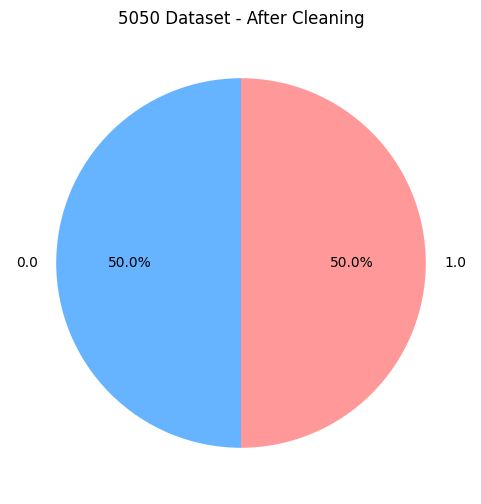

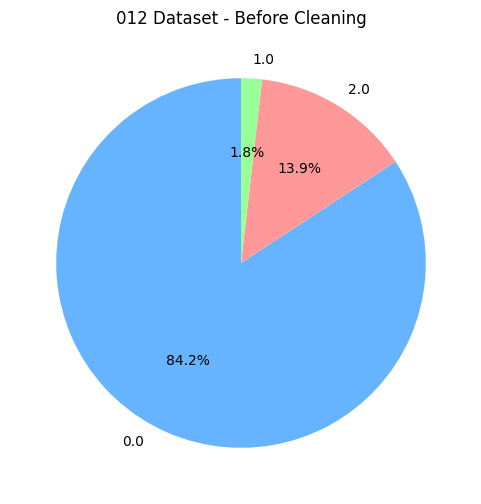

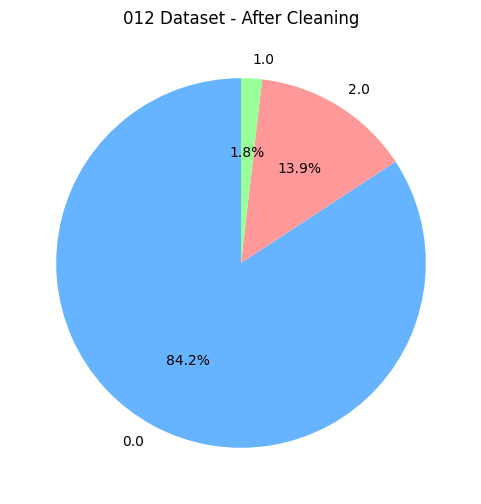

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

def plot_class_distribution(df, label_column, title):
    plt.figure(figsize=(6, 6))
    df[label_column].value_counts().plot.pie(
        autopct='%1.1f%%',
        labels=df[label_column].value_counts().index,
        startangle=90,
        colors=['#66b3ff', '#ff9999', '#99ff99']
    )
    plt.title(title)
    plt.ylabel('')
    plt.show()

# CDC
plot_class_distribution(df_cdc, 'Diabetes_binary', 'CDC Dataset - Before Cleaning')
plot_class_distribution(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset - After Cleaning')

# 5050
plot_class_distribution(df_5050, 'Diabetes_binary', '5050 Dataset - Before Cleaning')
plot_class_distribution(df_5050.dropna(), 'Diabetes_binary', '5050 Dataset - After Cleaning')

# 012
plot_class_distribution(df_012, 'Diabetes_012', '012 Dataset - Before Cleaning')
plot_class_distribution(df_012.dropna(), 'Diabetes_012', '012 Dataset - After Cleaning')


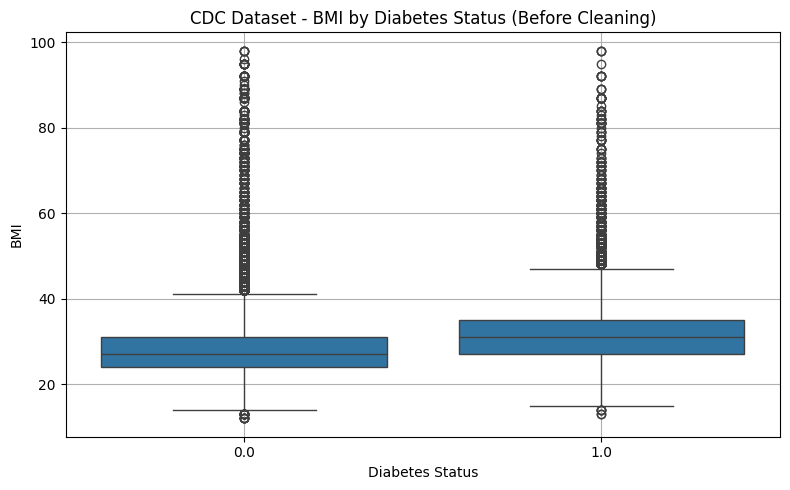

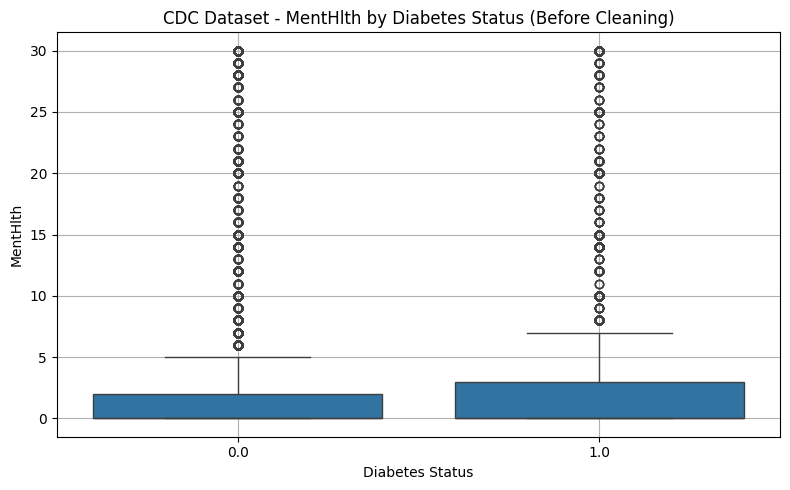

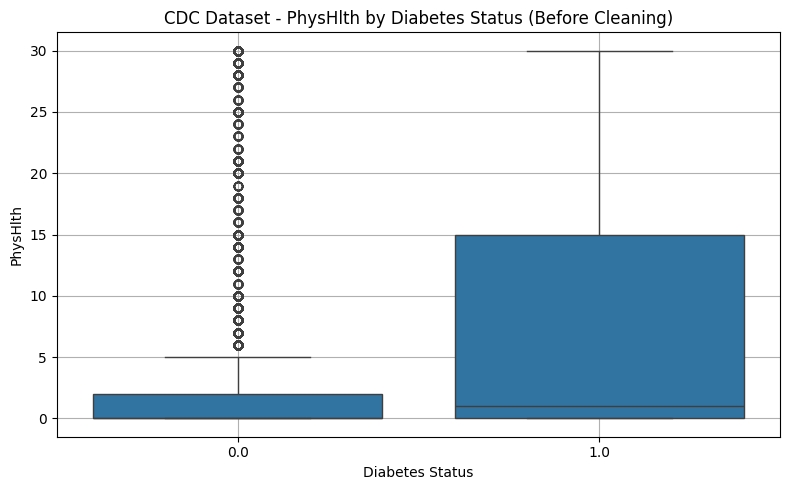

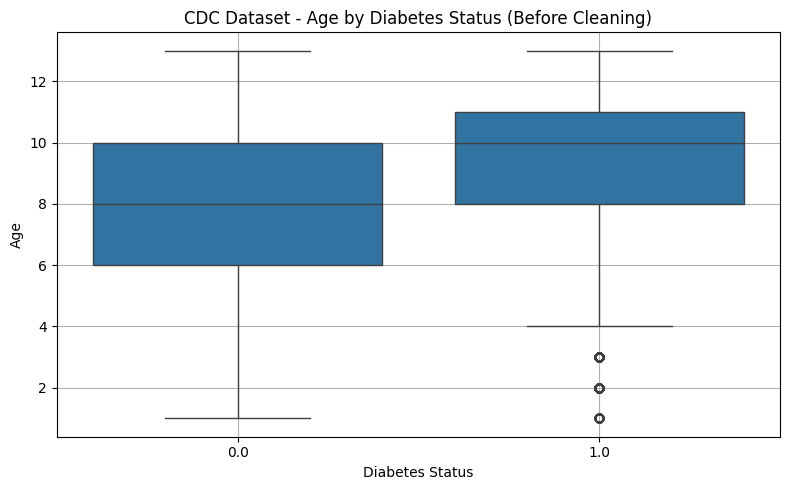

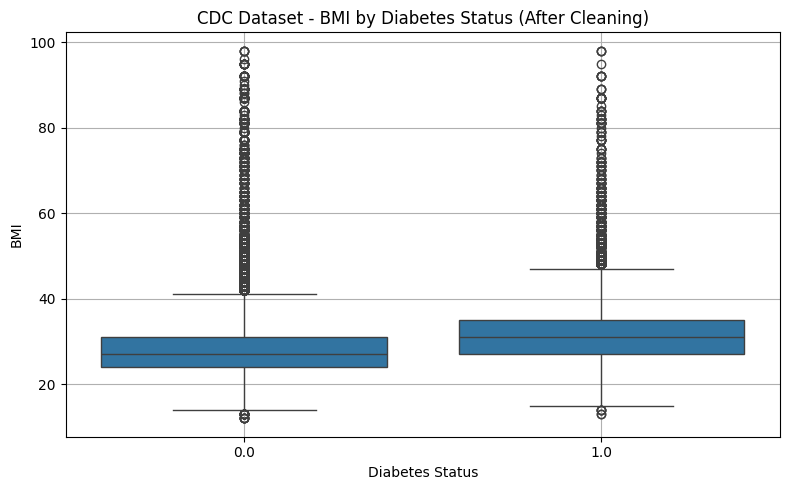

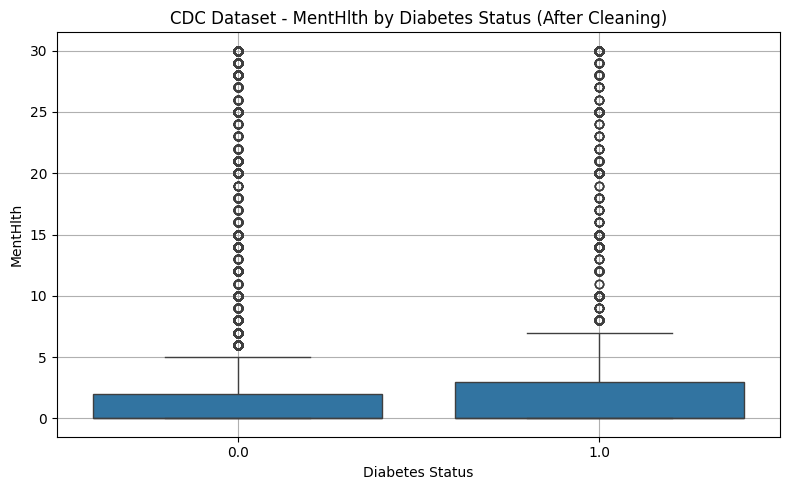

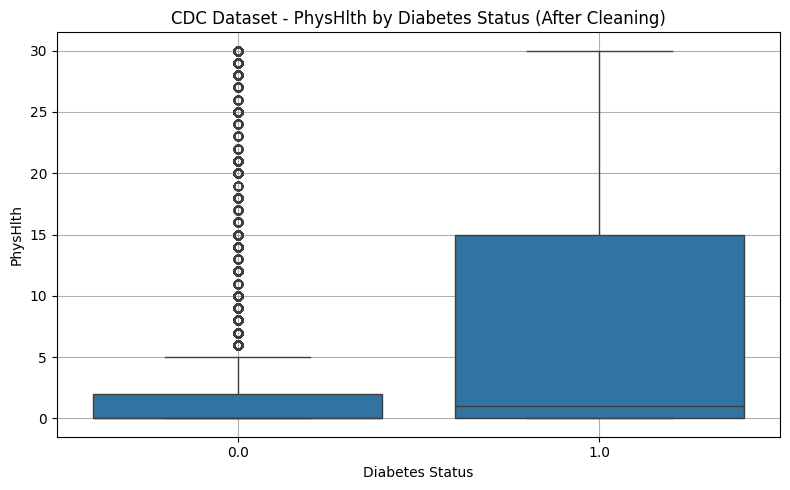

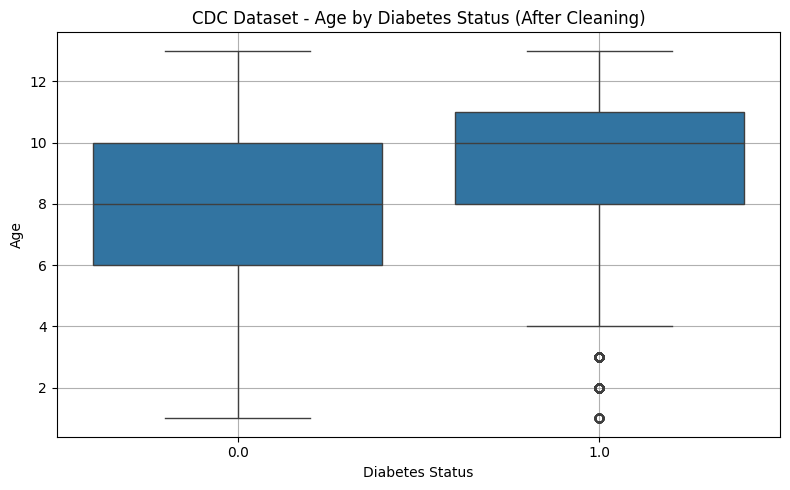

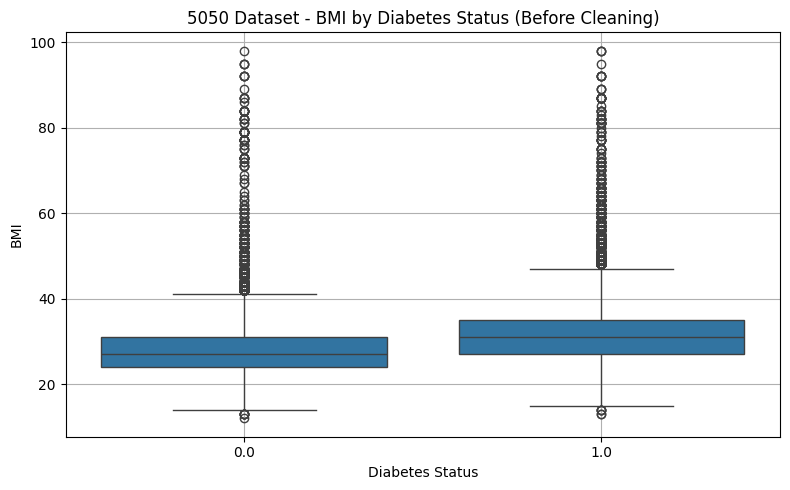

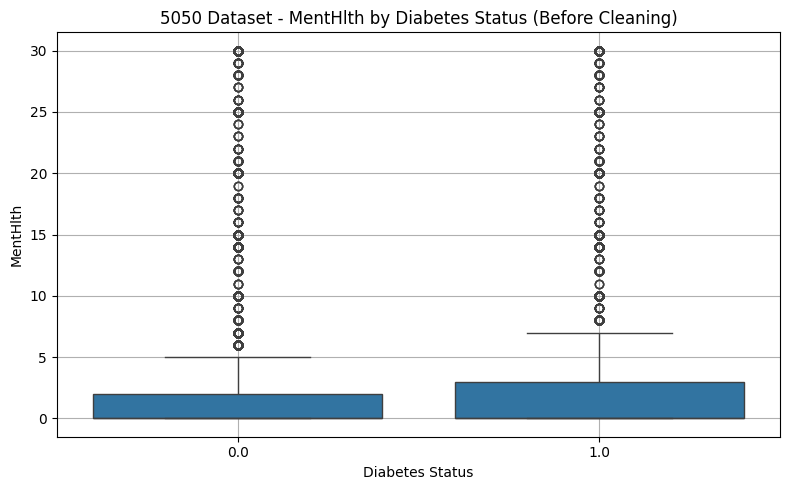

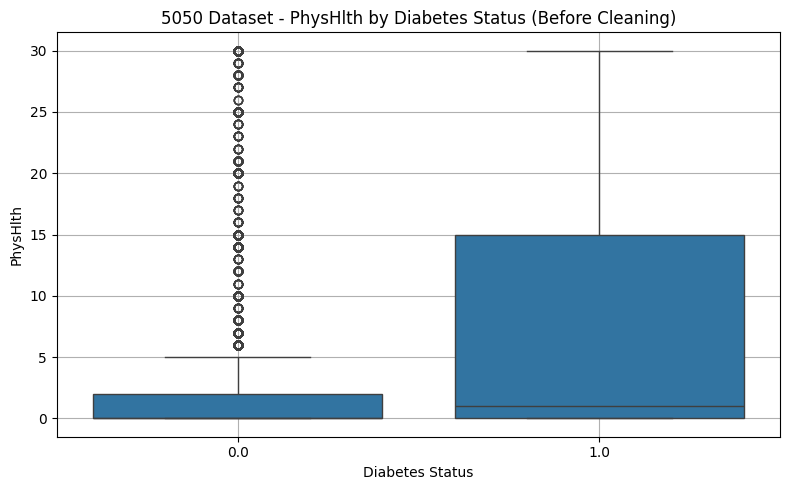

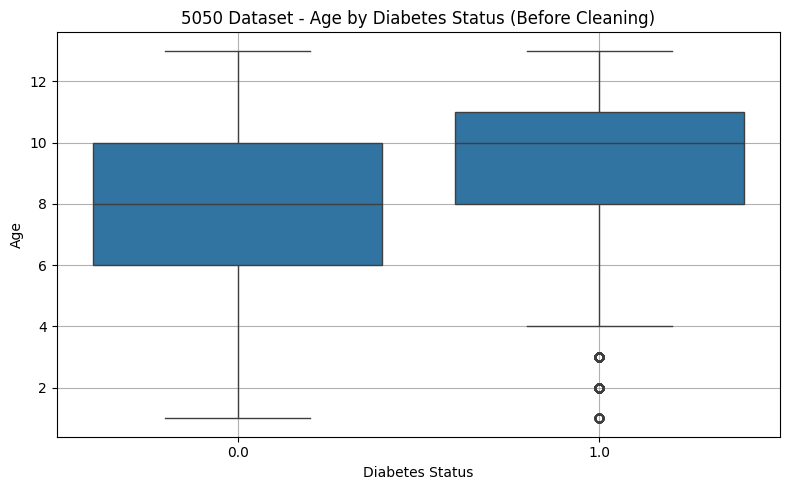

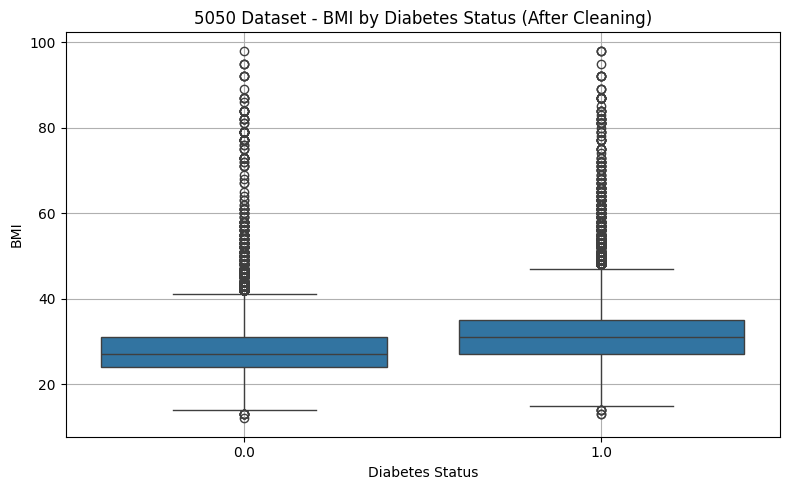

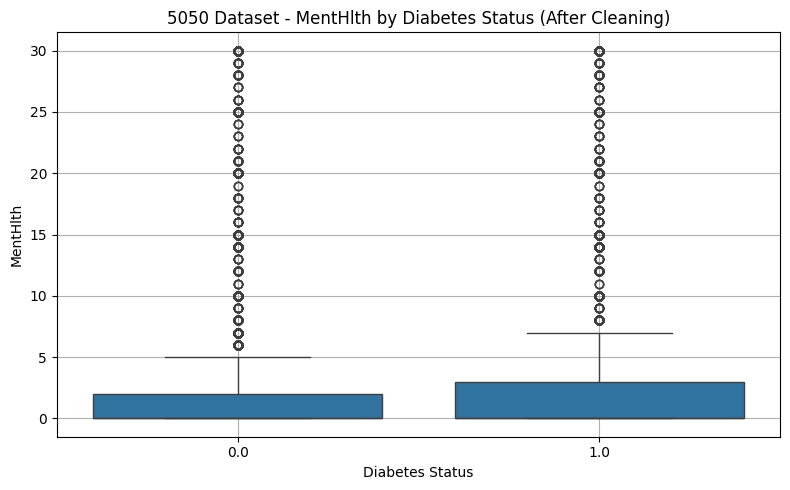

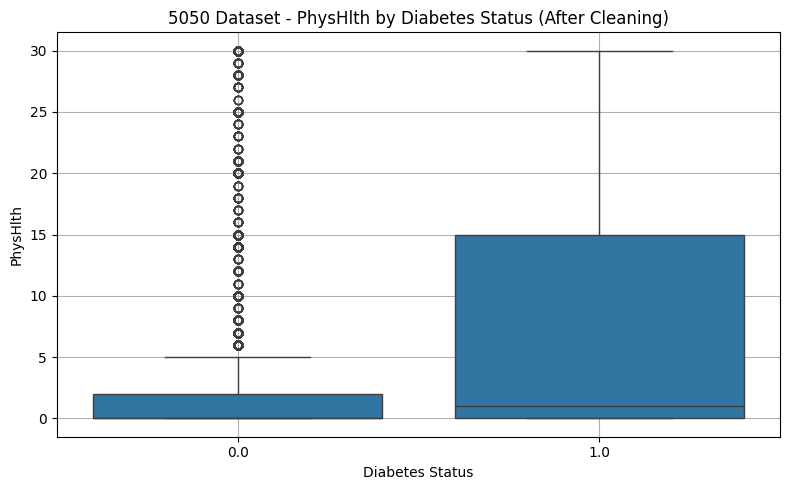

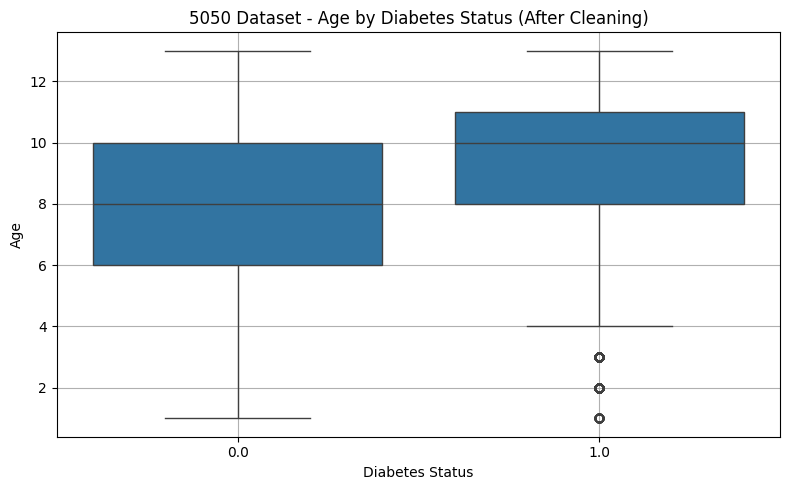

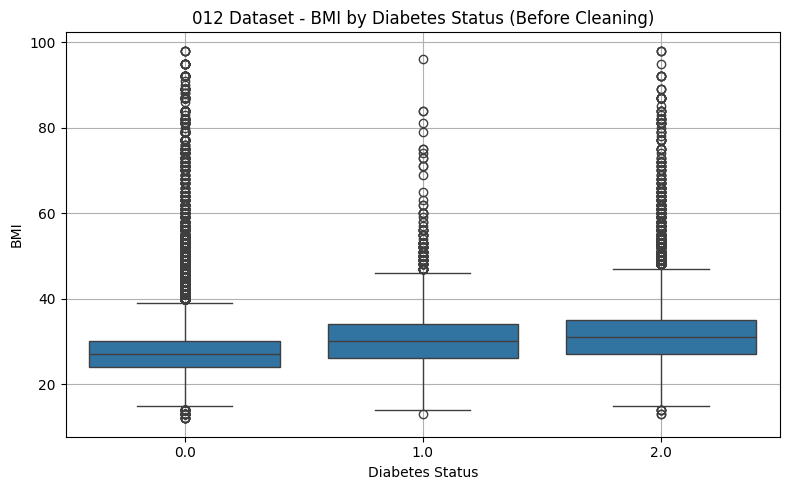

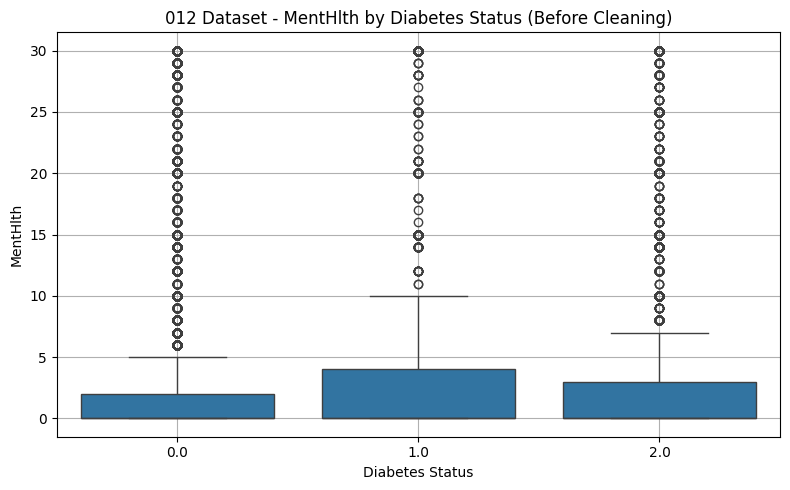

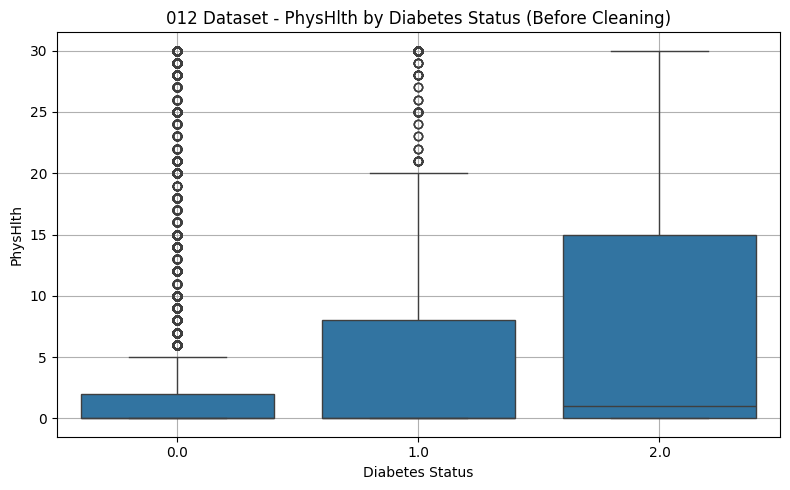

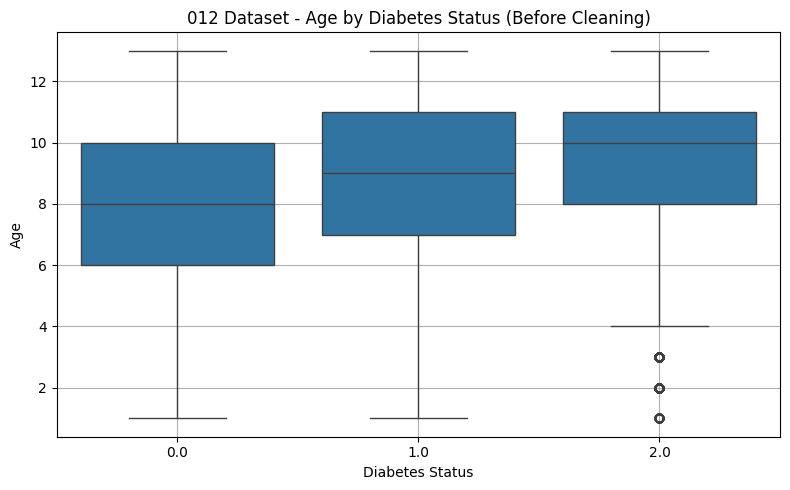

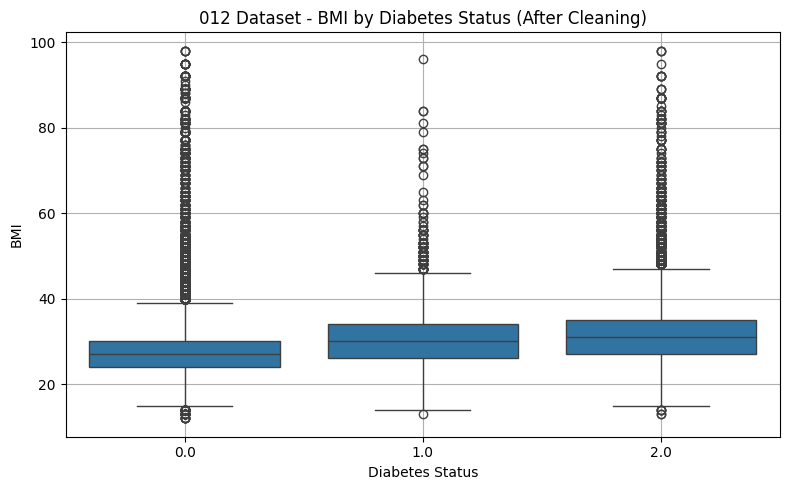

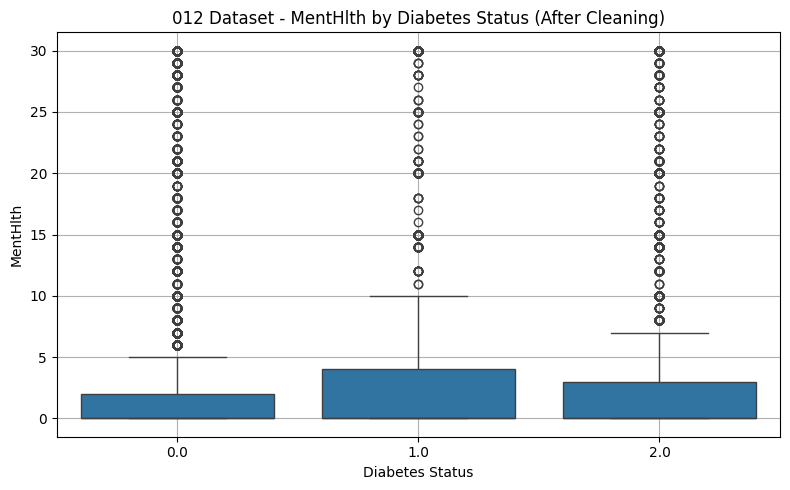

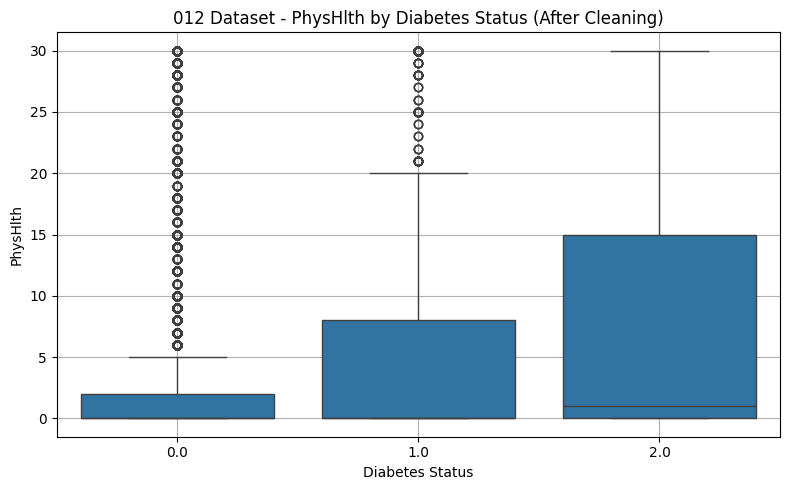

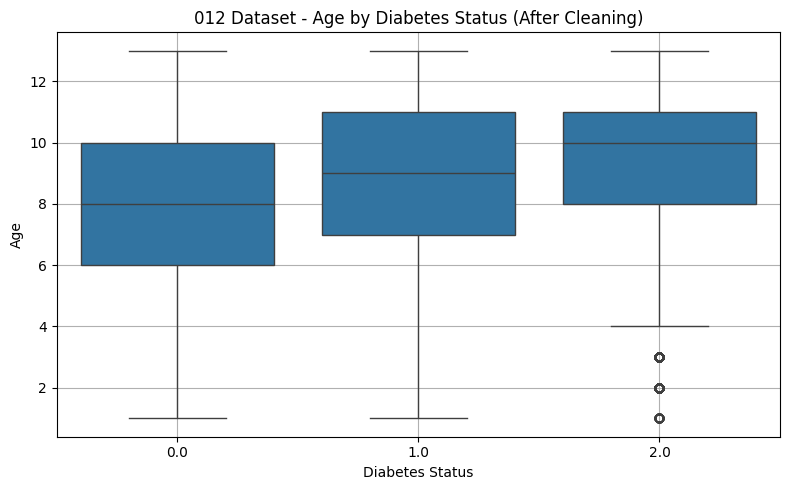

In [2]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

def plot_boxplots(df, target, features, dataset_name, stage):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target, y=feature, data=df)
        plt.title(f'{dataset_name} - {feature} by Diabetes Status ({stage})')
        plt.xlabel('Diabetes Status')
        plt.ylabel(feature)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
features_to_plot = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
#CDC
plot_boxplots(df_cdc, 'Diabetes_binary', features_to_plot, 'CDC Dataset', 'Before Cleaning')
plot_boxplots(df_cdc.dropna(), 'Diabetes_binary', features_to_plot, 'CDC Dataset', 'After Cleaning')

#5050
plot_boxplots(df_5050, 'Diabetes_binary', features_to_plot, '5050 Dataset', 'Before Cleaning')
plot_boxplots(df_5050.dropna(), 'Diabetes_binary', features_to_plot, '5050 Dataset', 'After Cleaning')

#012 Dataset
plot_boxplots(df_012, 'Diabetes_012', features_to_plot, '012 Dataset', 'Before Cleaning')
plot_boxplots(df_012.dropna(), 'Diabetes_012', features_to_plot, '012 Dataset', 'After Cleaning')


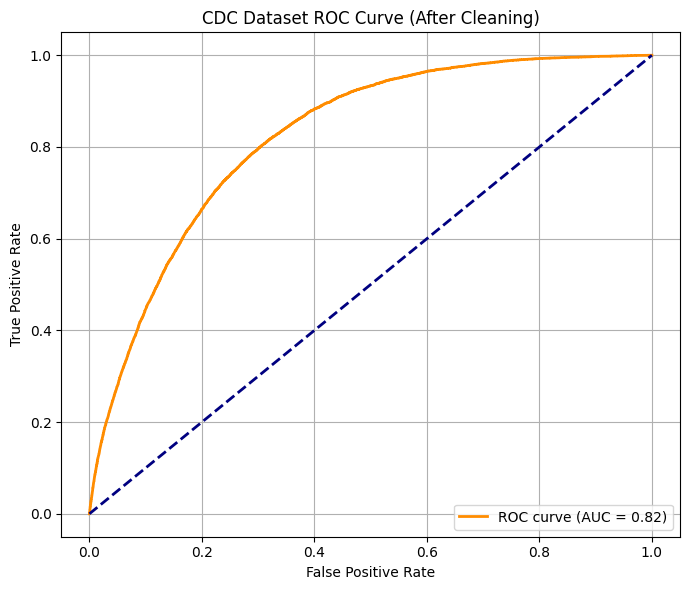

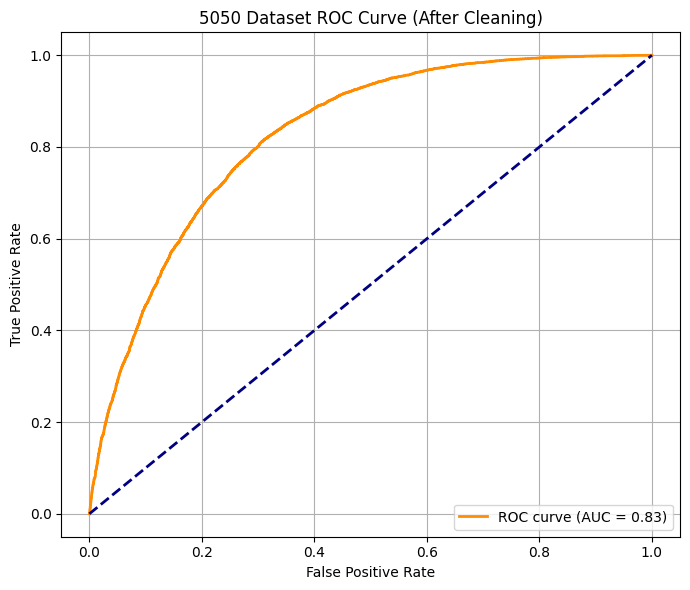

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multiclass format is not supported

In [3]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

def plot_roc(df, target_col, dataset_name, stage):
    df_clean = df.dropna()

    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{dataset_name} ROC Curve ({stage})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')
plot_roc(df_5050, 'Diabetes_binary', '5050 Dataset', 'After Cleaning')
plot_roc(df_012, 'Diabetes_012', '012 Dataset', 'After Cleaning')


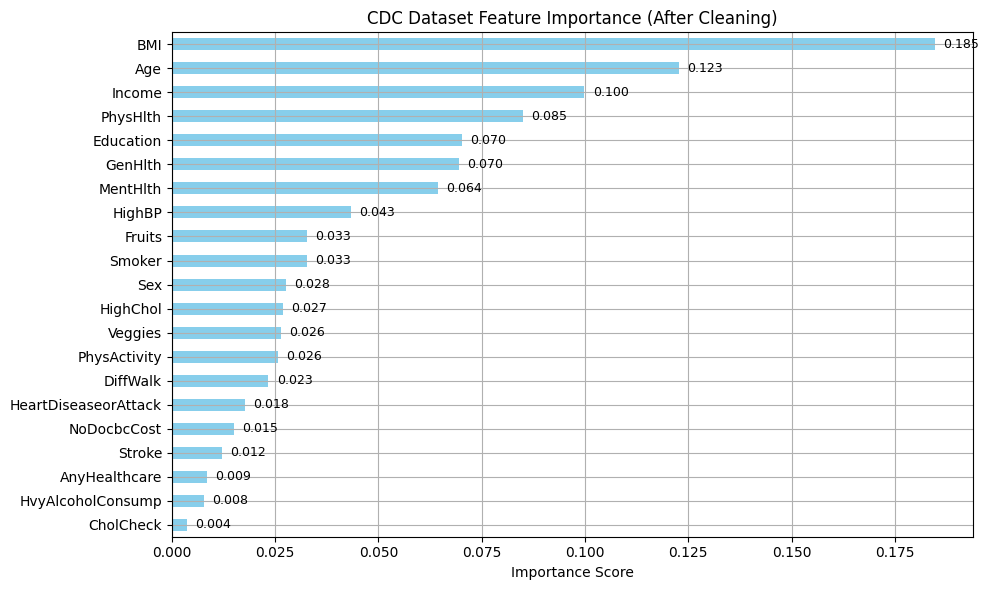

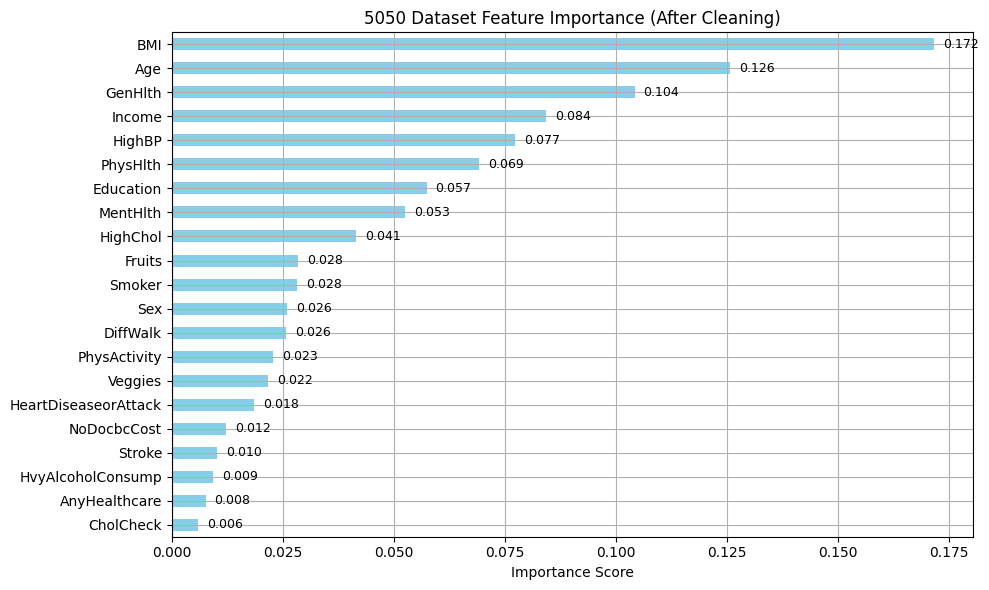

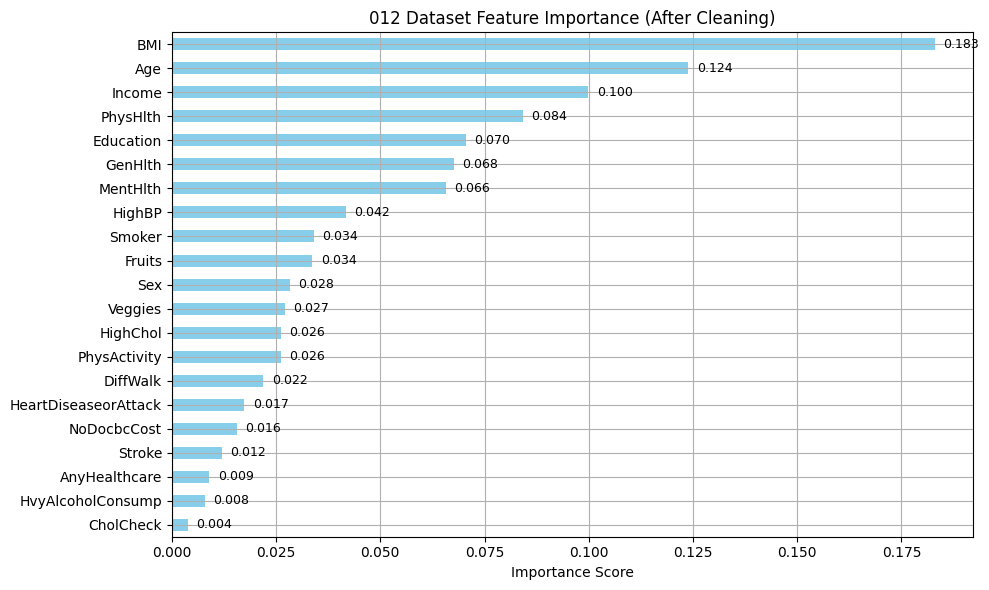

In [25]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

def plot_feature_importance(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances_sorted = importances.sort_values()

    plt.figure(figsize=(10, 6))
    ax = importances_sorted.plot(kind='barh', color='skyblue')
    plt.title(f'{dataset_name} Feature Importance ({stage})')
    plt.xlabel('Importance Score')
    plt.grid(True)
    for i, v in enumerate(importances_sorted):
        plt.text(v + 0.002, i, f'{v:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

plot_feature_importance(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')
plot_feature_importance(df_5050, 'Diabetes_binary', '5050 Dataset', 'After Cleaning')
plot_feature_importance(df_012, 'Diabetes_012', '012 Dataset', 'After Cleaning')


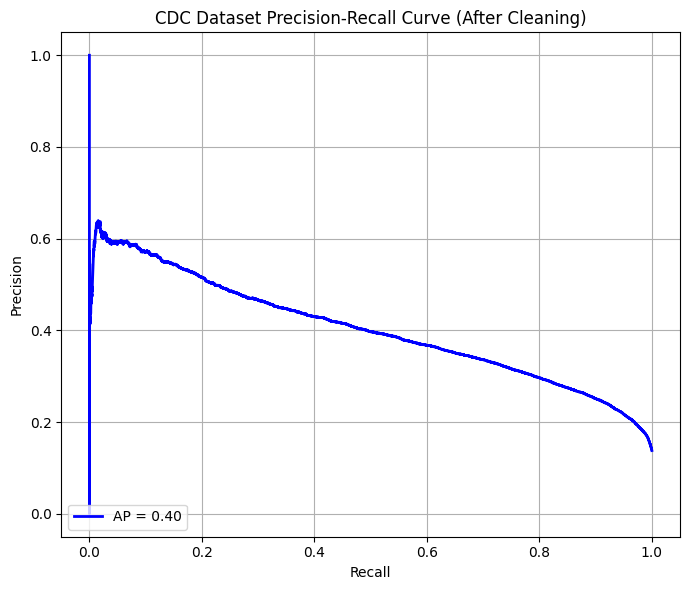

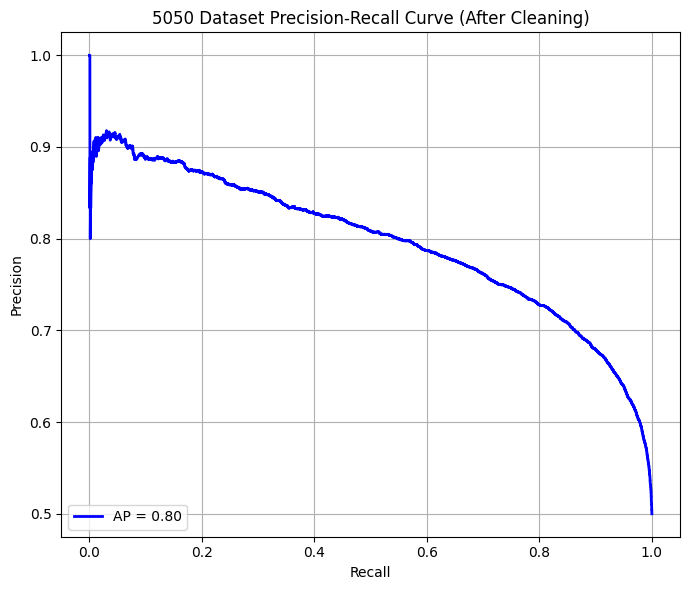

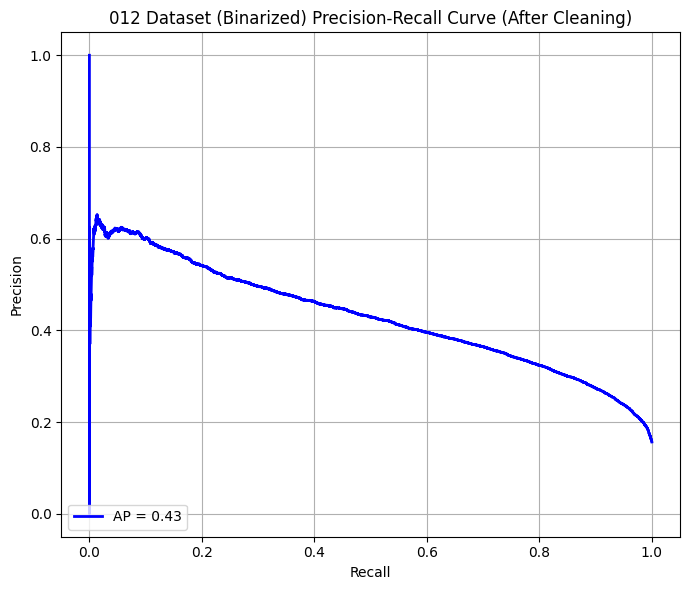

In [27]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

df_012['Diabetes_012'] = df_012['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)
def plot_pr_curve(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap_score = average_precision_score(y_test, y_scores)

    plt.figure(figsize=(7, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{dataset_name} Precision-Recall Curve ({stage})')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_pr_curve(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')
plot_pr_curve(df_5050, 'Diabetes_binary', '5050 Dataset', 'After Cleaning')
plot_pr_curve(df_012, 'Diabetes_012', '012 Dataset (Binarized)', 'After Cleaning')


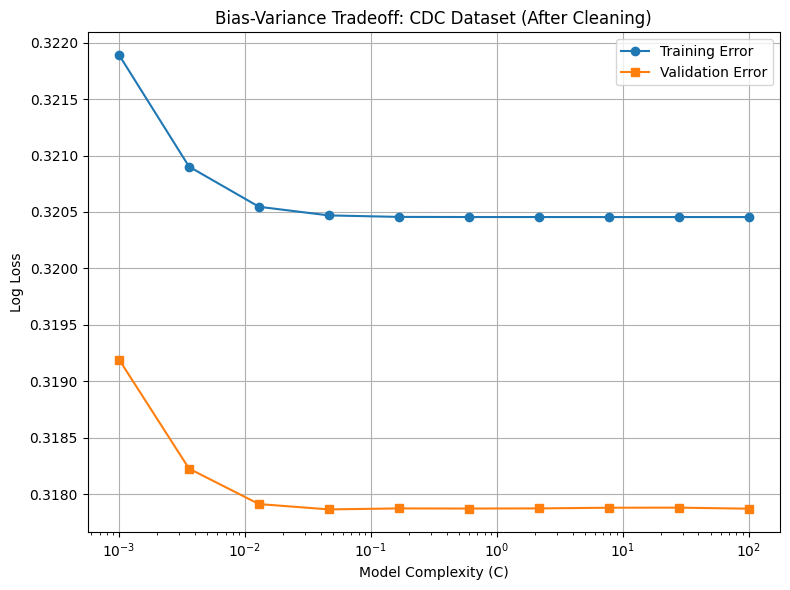

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load dataset
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Function to compute and plot bias-variance tradeoff
def bias_variance_plot(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    # Range of regularization strengths (C = 1/λ, so small C = more regularization)
    complexities = np.logspace(-3, 2, 10)
    train_errors = []
    val_errors = []

    for c in complexities:
        model = LogisticRegression(C=c, max_iter=1000)
        model.fit(X_train, y_train)

        y_train_pred = model.predict_proba(X_train)
        y_val_pred = model.predict_proba(X_val)

        train_loss = log_loss(y_train, y_train_pred)
        val_loss = log_loss(y_val, y_val_pred)

        train_errors.append(train_loss)
        val_errors.append(val_loss)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(complexities, train_errors, marker='o', label='Training Error')
    plt.plot(complexities, val_errors, marker='s', label='Validation Error')
    plt.xscale('log')
    plt.xlabel('Model Complexity (C)')
    plt.ylabel('Log Loss')
    plt.title(f'Bias-Variance Tradeoff: {dataset_name} ({stage})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for CDC dataset before and after cleaning
bias_variance_plot(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


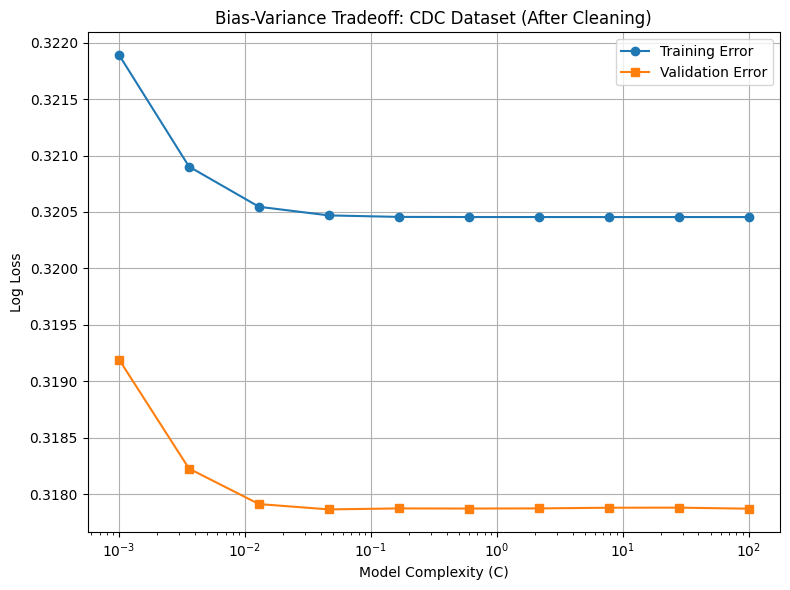

In [28]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

def bias_variance_plot(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    complexities = np.logspace(-3, 2, 10)
    train_errors = []
    val_errors = []
    for c in complexities:
        model = LogisticRegression(C=c, max_iter=1000)
        model.fit(X_train, y_train)
        y_train_pred = model.predict_proba(X_train)
        y_val_pred = model.predict_proba(X_val)
        train_loss = log_loss(y_train, y_train_pred)
        val_loss = log_loss(y_val, y_val_pred)
        train_errors.append(train_loss)
        val_errors.append(val_loss)

    plt.figure(figsize=(8, 6))
    plt.plot(complexities, train_errors, marker='o', label='Training Error')
    plt.plot(complexities, val_errors, marker='s', label='Validation Error')
    plt.xscale('log')
    plt.xlabel('Model Complexity (C)')
    plt.ylabel('Log Loss')
    plt.title(f'Bias-Variance Tradeoff: {dataset_name} ({stage})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

bias_variance_plot(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


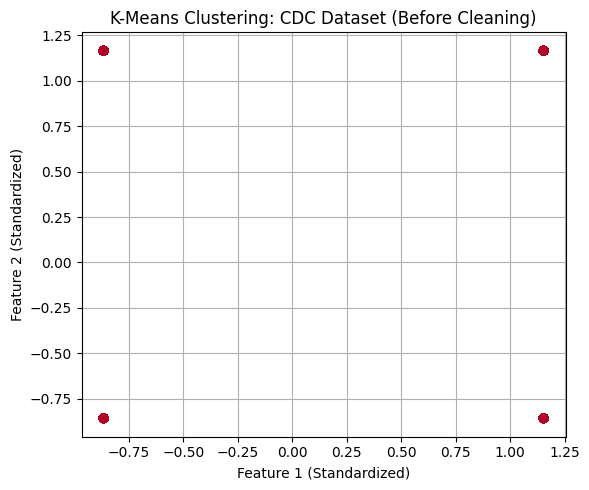

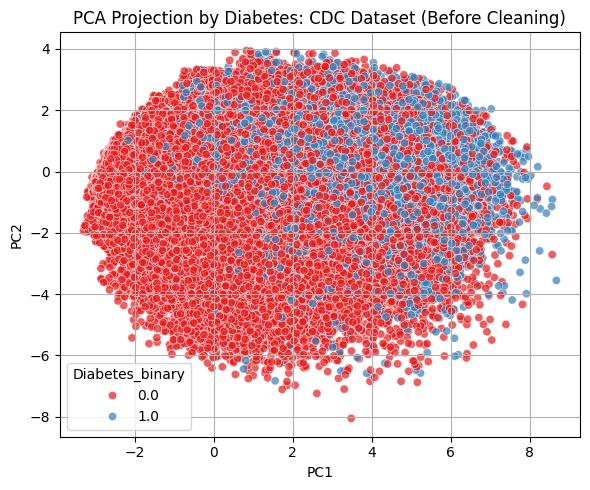

In [ ]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

def plot_clustering(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(6, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
    plt.title(f'K-Means Clustering: {dataset_name} ({stage})')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
    plt.title(f'PCA Projection by Diabetes: {dataset_name} ({stage})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #tsne
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set2', alpha=0.7)
    plt.title(f't-SNE Projection by Diabetes: {dataset_name} ({stage})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_clustering(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_clustering(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


<ipython-input-1-b0af6274d421>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, palette='Blues_d')


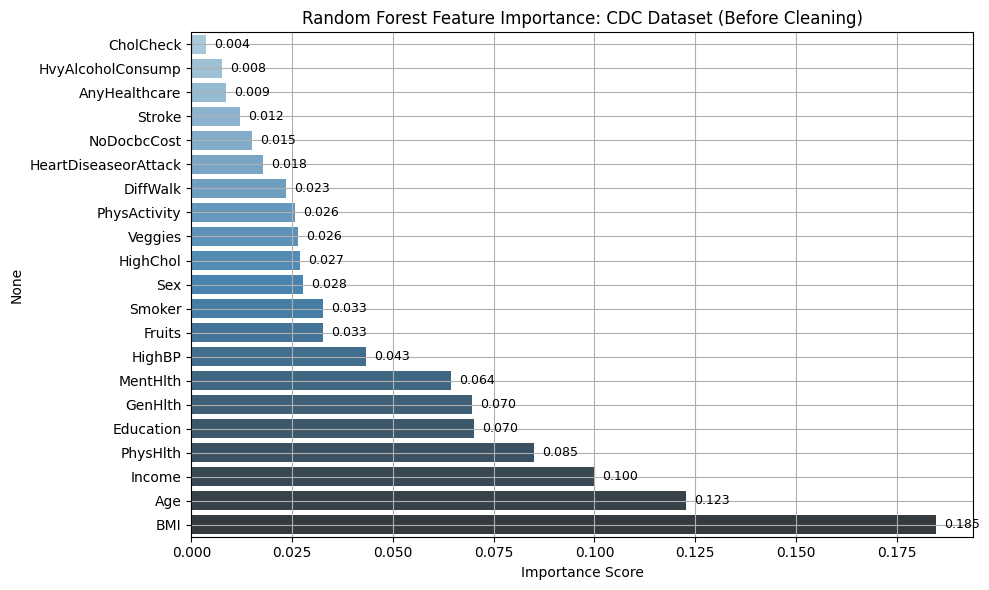

<ipython-input-1-b0af6274d421>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, palette='Blues_d')


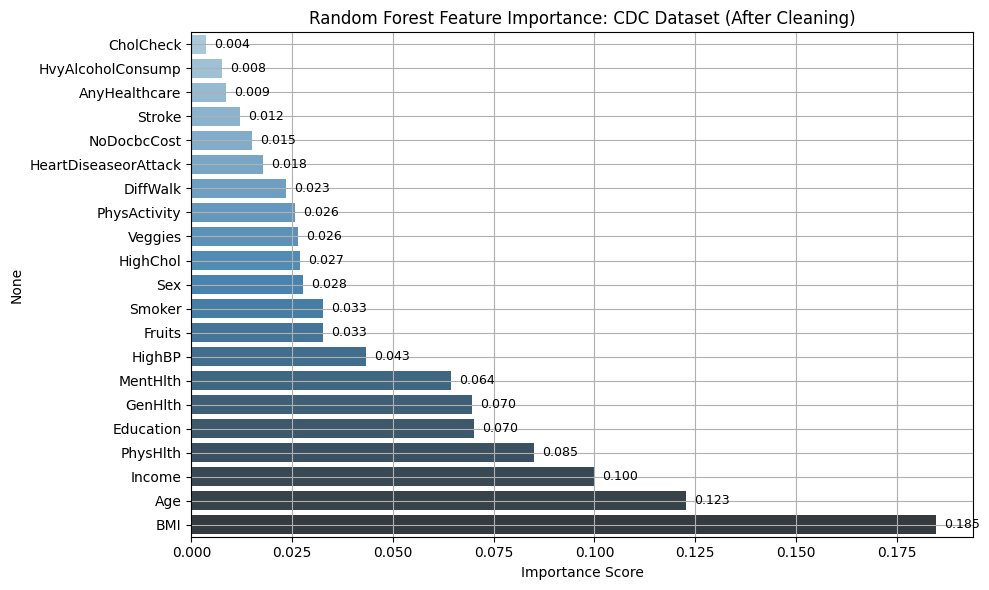

In [1]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
def plot_rf_feature_importance(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)
    importances = rf.feature_importances_
    features = X.columns
    importance_series = pd.Series(importances, index=features).sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_series.values, y=importance_series.index, palette='Blues_d')
    for i, v in enumerate(importance_series):
        plt.text(v + 0.002, i, f'{v:.3f}', va='center', fontsize=9)
    plt.title(f'Random Forest Feature Importance: {dataset_name} ({stage})')
    plt.xlabel('Importance Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_rf_feature_importance(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_rf_feature_importance(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


In [ ]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
def plot_conf_matrix(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f'Confusion Matrix: {dataset_name} ({stage})')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_conf_matrix(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')
